<a href="https://colab.research.google.com/github/billbch/Clasification-posture/blob/main/Mobilenetv2_clasificador_de_buena_o_mala_postura_sentado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir sitting_well
!mkdir sitting_wrong

In [ ]:
%cd sitting_well
!unzip sitting_well.zip
%cd ..

%cd sitting_wrong
!unzip sitting_wrong.zip
%cd ..


/content/sitting_well
Archive:  sitting_well.zip
  inflating: image552.jpg            
  inflating: image563.jpg            
  inflating: image568.jpg            
  inflating: image655.jpg            
  inflating: image657.jpg            
  inflating: image659.jpg            
  inflating: image(1).jpg            
  inflating: image.jpg               
  inflating: image3.jpg              
  inflating: image4.jpg              
  inflating: image14.jpg             
  inflating: image20.jpg             
  inflating: image23.jpg             
  inflating: image33.jpg             
  inflating: image36.jpg             
  inflating: image38.jpg             
  inflating: image40.jpg             
  inflating: image42.jpg             
  inflating: image43.jpg             
  inflating: image47.jpg             
  inflating: image48.jpg             
  inflating: image59.jpg             
  inflating: image63.jpg             
  inflating: image65.jpg             
  inflating: image66.jpg             
 

In [ ]:
#borrar zips
!rm -rf /content/sitting_well/sitting_well.zip
!rm -rf /content/sitting_wrong/sitting_wrong.zip

In [ ]:
#mostrar cantidad de im de c/u
!ls /content/sitting_well | wc -l #97
!ls /content/sitting_wrong | wc -l #123

97
123


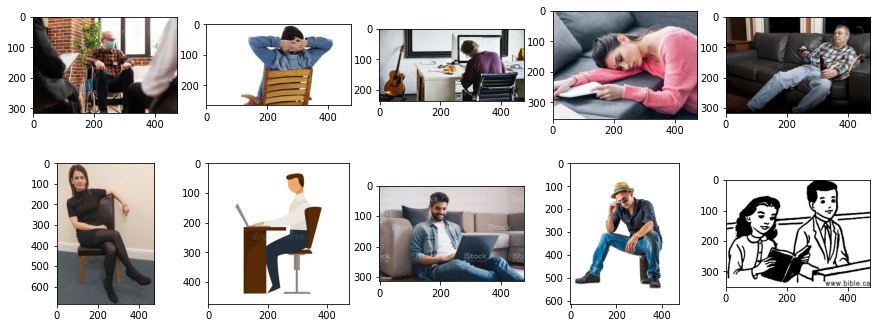

In [ ]:
#ver imagenes
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/sitting_wrong'
imagenes = os.listdir(carpeta)
for i, nombreimg in enumerate(imagenes[:10]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#borrar zips
!rm -rf /content/dataset

In [ ]:
#crear crpeta dataset

!mkdir dataset
!mkdir dataset/sitting_well
!mkdir dataset/sitting_wrong

In [ ]:
#borrar .ipynb_checkpoints
!rm -rf /content/sitting_well/.ipynb_checkpoints

In [ ]:
#copiar imagenes originales a la carpeta dataset
#con misma cantidad
import shutil

carpeta_fuente = '/content/sitting_well'
carpeta_destino = '/content/dataset/sitting_well'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i<103:
    #copiar de fuente a destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)


In [ ]:
#copiar imagenes originales a la carpeta dataset
#con misma cantidad
import shutil

carpeta_fuente = '/content/sitting_wrong'
carpeta_destino = '/content/dataset/sitting_wrong'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i<97:
    #copiar de fuente a destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)
    

In [ ]:
#mostrar cantidad de im de c/u del nuevo datset
!ls /content/dataset/sitting_well | wc -l #
!ls /content/dataset/sitting_wrong | wc -l #

97
97


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
#crear dataset generator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2 #20% para pruebas
    )

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')

data_gen_pruebas = datagen.flow_from_directory('/content/dataset',target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')


Found 156 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


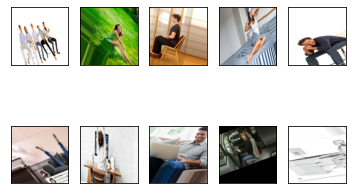

In [ ]:
#imprimir 10 img del generador de entrenamiento
for image, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
mobilenetv2 = hub.KerasLayer(url,input_shape=(224,224,3))

In [ ]:
#congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=2)

In [ ]:
#compilar
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
EPOCAS=50

historial = modelo.fit(data_gen_entrenamiento, epochs=EPOCAS,callbacks=[earlystop_callback],batch_size=32,
                       validation_data= data_gen_pruebas)

Epoch 1/50
5/5 [==============================] - 13s 754ms/step - loss: 0.8116 - accuracy: 0.5897 - val_loss: 0.6065 - val_accuracy: 0.6842
Epoch 2/50
5/5 [==============================] - 3s 532ms/step - loss: 0.7578 - accuracy: 0.5962 - val_loss: 0.6700 - val_accuracy: 0.6842
Epoch 3/50
5/5 [==============================] - 3s 531ms/step - loss: 0.7469 - accuracy: 0.5897 - val_loss: 0.8513 - val_accuracy: 0.5789


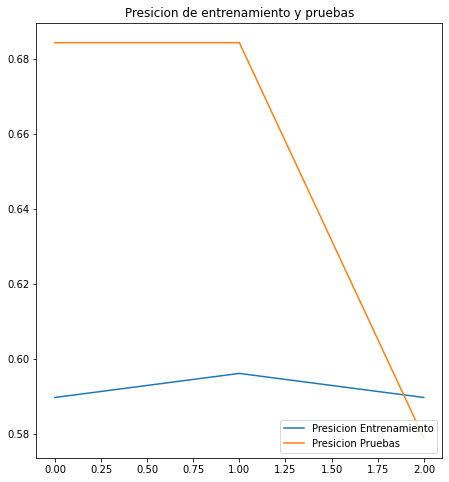

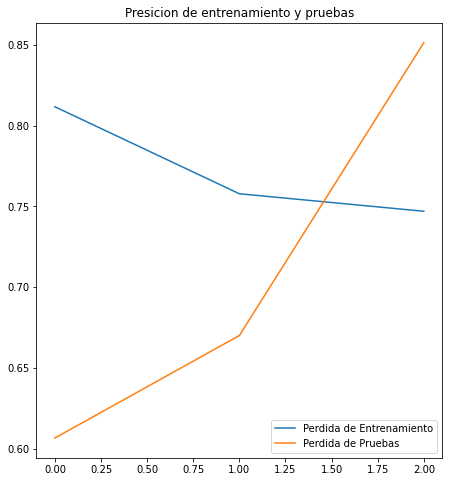

In [ ]:
#Gracias
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(len(acc))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Presicion Entrenamiento')
plt.plot(rango_epocas, val_acc,label='Presicion Pruebas')
plt.legend(loc='lower right')
plt.title('Presicion de entrenamiento y pruebas')
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, loss, label='Perdida de Entrenamiento')
plt.plot(rango_epocas, val_loss,label='Perdida de Pruebas')
plt.legend(loc='lower right')
plt.title('Presicion de entrenamiento y pruebas')
plt.show()


In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediccion[0],axis=-1)


In [ ]:
#0 = bien #1 = mal
url='https://i.ibb.co/RCCtVf8/Whats-App-Image-2022-11-10-at-10-45-41-PM.jpg'
prediccion = categorizar(url)
print(prediccion)

1/1 [==============================] - 0s 61ms/step
1
